# **Project Name**    - Health Insurance Cross Sell Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Our client is an Insuarance company that provides health Isuarance to its customers. The client wants us to predict whether the existing holders will will be intrested for vehicle insuarance or not. The client gave us the dataset which has the columns like:- Age, Driving license, previously insured, Vehicle damage,Vehicle age, Annual premium, Vintage, etc. In this project we will go through the data, deal with null and duplicate values, perform EDA and we will find key insights from the data by data visualization. The next step will be pre processing the data and perform feature enginnering and feature selection, handle class imbalance and then we will fit various Machine learning model to get best possible Machine learning model that will predict whether the customer is intrested in vehicle insuarance or not

# **GitHub Link -**

https://github.com/umerulla

# **Problem Statement**


This is an Classification project in which the dataset has information on the insuarance, vehicle details and some customer information by which we have to predict whether the customer is intrested in vehicle insuarance or not. We will analyze the data, find key insights by visualization and fit the best possible model for prediction

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Data Science/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(381109, 12)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print('Total dupliactes in the data are',len(df[df.duplicated()]))

Total dupliactes in the data are 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There are no null values present

### What did you know about your dataset?

In this dataset we have information on Customer's gender,age,driving license, region code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage and Response. We found out that there are no null values present and even there are no duplicates present out of 381109 observations. There are 3 columns with object as its datatype and rest all the columns have integrer and float as their datatype. further we will change the categorical observations into numerical data and perform the rest of the work to predict the outcome

## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [9]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

* id- indicates the unique id of the customer
* Gender- States the gender of the customer
* Age- States the age of the customer
* Driving_License- States whether the customer has license or no( 0 means he has no license, 1 means he has license)
* Region_Code- States the region code of the customer
* Previously_Insured- States whether the customer have previously insured or no ( 0 means no insured, 1 means insured)
* Vehicle_Age- States the age of the vehicle
* Vehicle_Damage- States whether the customer have done any damage to the vehicle or no
* Annual_Premium- Sum of the money the customers pays regularly for this guarantee
* Policy_Sales_Channel- States the channel number of the sales (diffrent channels to reach out the customers)
* Vintage- States the number of days the customer is associated with the company
* Response- States if the customer is intrested or not(0 means he is not intrested, 1 means he is intrested)

### Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable.
print(df.apply(lambda x : x.unique()))

id                      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Gender                                                     [Male, Female]
Age                     [44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 3...
Driving_License                                                    [1, 0]
Region_Code             [28.0, 3.0, 11.0, 41.0, 33.0, 6.0, 35.0, 50.0,...
Previously_Insured                                                 [0, 1]
Vehicle_Age                               [> 2 Years, 1-2 Year, < 1 Year]
Vehicle_Damage                                                  [Yes, No]
Annual_Premium          [40454.0, 33536.0, 38294.0, 28619.0, 27496.0, ...
Policy_Sales_Channel    [26.0, 152.0, 160.0, 124.0, 14.0, 13.0, 30.0, ...
Vintage                 [217, 183, 27, 203, 39, 176, 249, 72, 28, 80, ...
Response                                                           [1, 0]
dtype: object


## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Changing the observation of the features from categorical to numerical values
df['Driving_License'] = df['Driving_License'].apply(lambda x : 'Yes' if x == 1 else 'No')
df['Previously_Insured'] = df['Previously_Insured'].apply(lambda x : 'Yes' if x == 1 else 'No')

In [12]:
# Dropping the id column
df.drop('id', axis = 1, inplace = True)

### What all manipulations have you done and insights you found?

* Firstly I changed the categorical column to numerical values.
* Dropped the Id column beccause it will make no sense to build Machine learning model.
* There were no null and duplicate values present in this dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

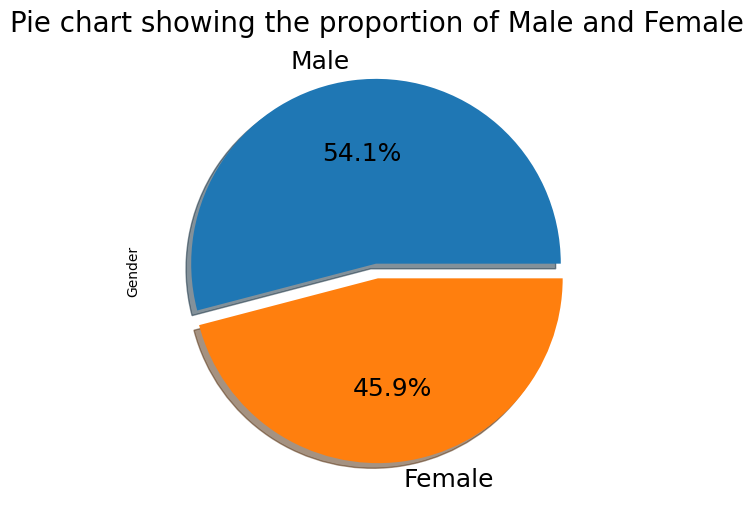

Male      206089
Female    175020
Name: Gender, dtype: int64


In [63]:
# Chart - 1 visualization code
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%',figsize = (8,6), fontsize= 18, explode = [0.04,0.04], shadow = True)
plt.title('Pie chart showing the proportion of Male and Female',fontsize = 20)

plt.show()

# prining the actual values
print(df['Gender'].value_counts())

##### 1. Why did you pick the specific chart?

Pie chart helps us to compare two variable as a whole

##### 2. What is/are the insight(s) found from the chart?

There are around 54.1% male present in the given data

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are less number of females in the given data. The company needs to focus targetting female customers

#### Chart - 2

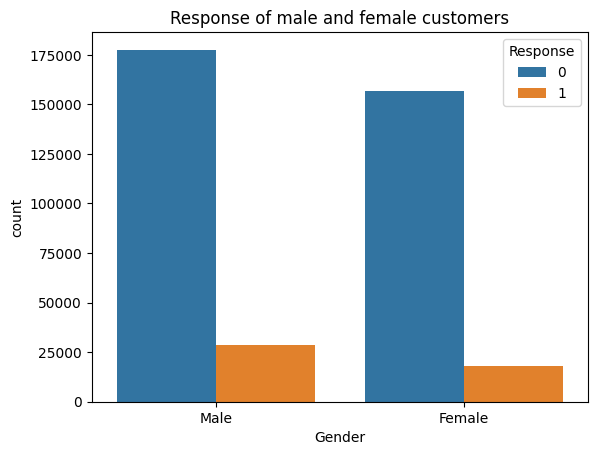

Male      206089
Female    175020
Name: Gender, dtype: int64


In [81]:
# Chart - 2 visualization code
sns.countplot(x = 'Gender' , data = df , hue = 'Response')
plt.title('Response of male and female customers')
plt.show()
# prining the actual values
print(df['Gender'].value_counts())

##### 1. Why did you pick the specific chart?

Count plot helps to compare the male and female customers along with their response

##### 2. What is/are the insight(s) found from the chart?

The response from male customers is high than female customers

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The company should focus on targetting female customers as the response from female customers are low compared to male customers

#### Chart - 3

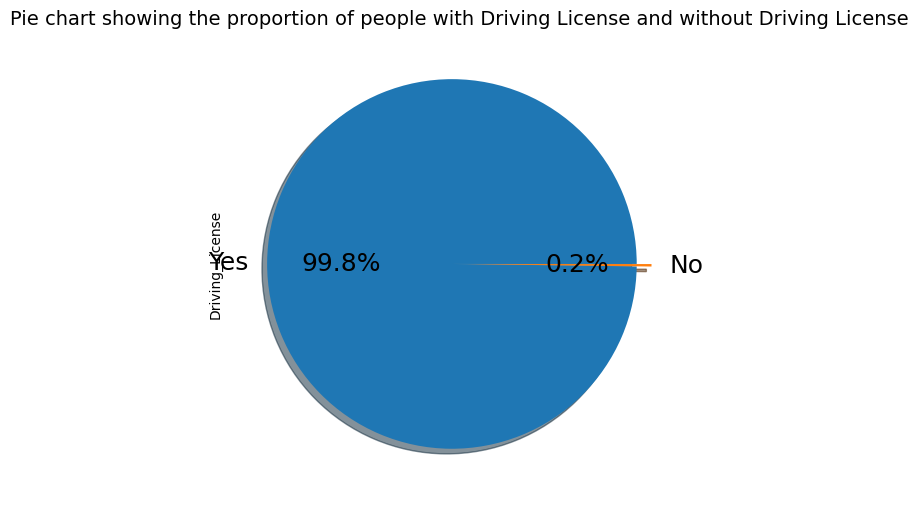

Yes    380297
No        812
Name: Driving_License, dtype: int64


In [64]:
# Chart - 3 visualization code
df['Driving_License'].value_counts().plot.pie(autopct='%1.1f%%',figsize = (8,6), fontsize= 18, explode = [0.04,0.04], shadow = True)

plt.title('Pie chart showing the proportion of people with Driving License and without Driving License',fontsize = 14)
plt.show()

# prining the actual values
print(df['Driving_License'].value_counts())

##### 1. Why did you pick the specific chart?

Pie chart helps us to compare two variable as a whole

##### 2. What is/are the insight(s) found from the chart?

Around 99.8% of the customers have their driving license

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

99% of its customers have their driving license, so the company have the best possible oppurtunity to sell their vehicle insurance

#### Chart - 4

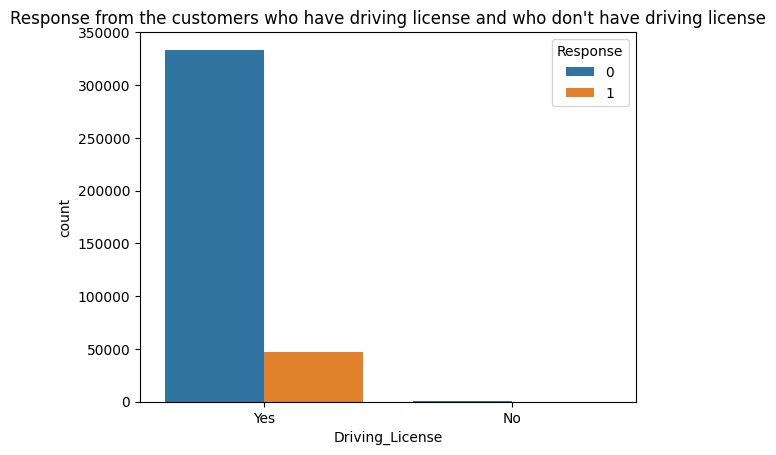

Yes    380297
No        812
Name: Driving_License, dtype: int64


In [82]:
# Chart - 4 visualization code
sns.countplot(x = 'Driving_License' , data = df , hue = 'Response')
plt.title("Response from the customers who have driving license and who don't have driving license")
plt.show()
# prining the actual values
print(df['Driving_License'].value_counts())

##### 1. Why did you pick the specific chart?

Count plot helps to compare the people with driving and without driving license along with their response



##### 2. What is/are the insight(s) found from the chart?

The people with driving license are the one's who are intrested in buying vehicle insurance

#### Chart - 5

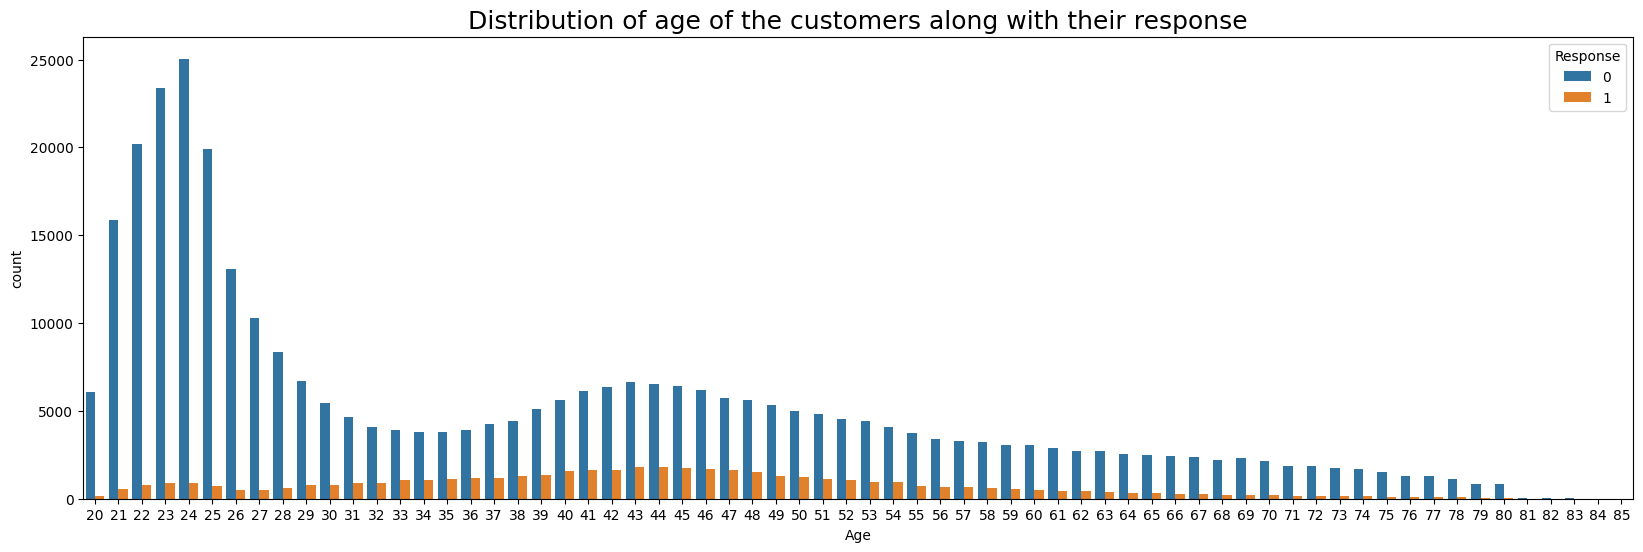

In [87]:
# Chart - 5 visualization code
fig, ax = plt.subplots(figsize=(20, 6))
plt.title('Distribution of age of the customers along with their response',fontsize = (18))
sns.countplot(x = 'Age',data = df , hue = 'Response')
fig.show()


##### 1. Why did you pick the specific chart?

subplots helps to compare distribution of age according to their response


##### 2. What is/are the insight(s) found from the chart?

There are lots of customers with age of 20-32

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The customers with age 20-32 have very few response compared to age group of 33-55. The company should focus more on the customers of age group 20-32

#### Chart - 6

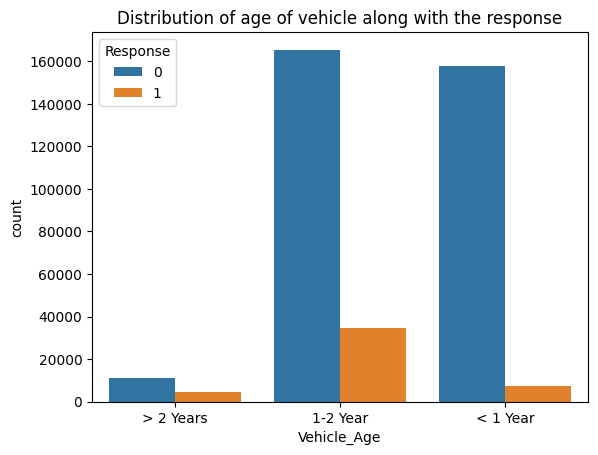

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64


In [88]:
# Chart - 6 visualization code
sns.countplot(x = 'Vehicle_Age' , data = df , hue = 'Response')
plt.title('Distribution of age of vehicle along with the response')
plt.show()
# prining the actual values
print(df['Vehicle_Age'].value_counts())

##### 1. Why did you pick the specific chart?

Count plot helps to compare the distribution of age of the vehicle along with the response

##### 2. What is/are the insight(s) found from the chart?

* There are most amount of customers with the evhicle age of 1-2 years
* There are very few customers with vehicle age more than 2 years

#### Chart - 7

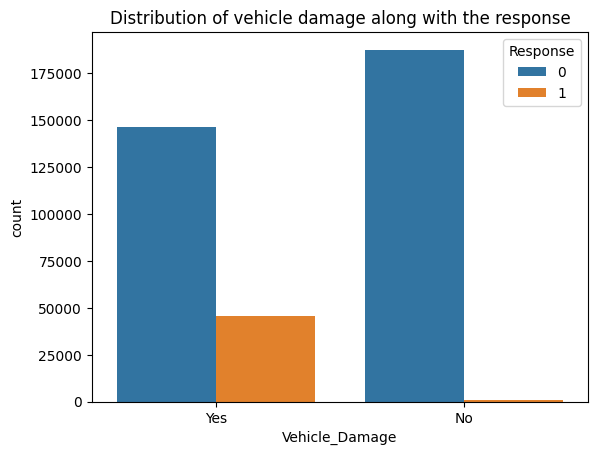

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


In [89]:
# Chart - 7 visualization code
sns.countplot(x = 'Vehicle_Damage' , data = df , hue = 'Response')
plt.title('Distribution of vehicle damage along with the response')
plt.show()
# prining the actual values
print(df['Vehicle_Damage'].value_counts())

##### 1. Why did you pick the specific chart?

Count plot helps to compare the distribution of vehicle damage along with the response

##### 2. What is/are the insight(s) found from the chart?

The highest response is from the customers with their vehicle already been damaged

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The least amount of response is from the customers that doesn't have any damage to their vehicle. The company should create awareness among the customers and give them knowledge of vehicle insurance benefits so that the response will increase from this category

#### Chart - 8

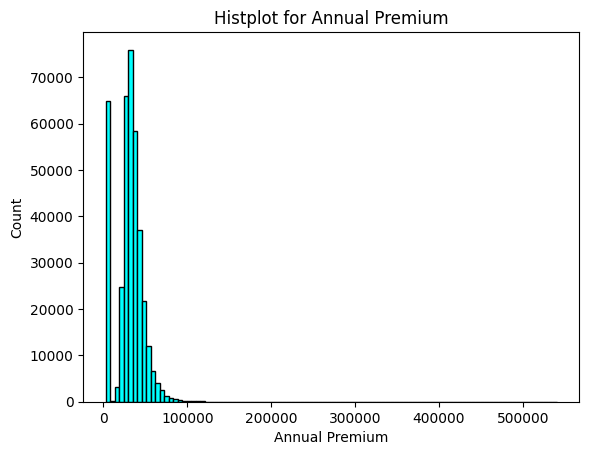

In [74]:
# Chart - 8 visualization code
plt.hist(df['Annual_Premium'], bins = 100, color='cyan', edgecolor = 'black')

plt.xlabel('Annual Premium')
plt.ylabel('Count')
plt.title('Histplot for Annual Premium')
plt.show()


##### 1. Why did you pick the specific chart?

Histogram helps to compare the distribution of Annual premium paid

##### 2. What is/are the insight(s) found from the chart?

The maximum number of people pay the anual premium not exceeding 1 lakh rupees

#### Chart - 9

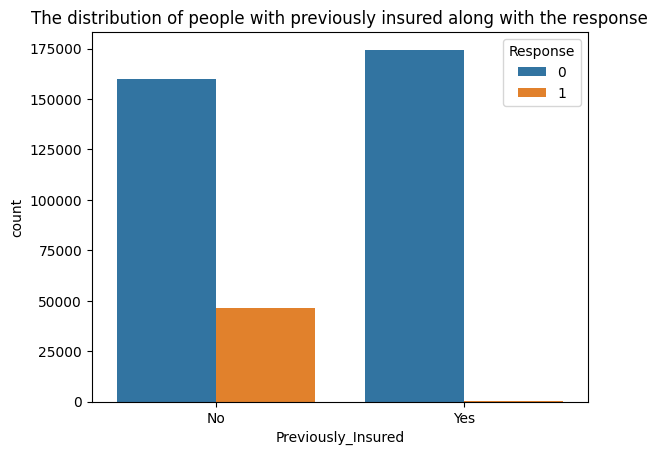

No     206481
Yes    174628
Name: Previously_Insured, dtype: int64


In [90]:
# Chart -9 visualization code
sns.countplot(x = 'Previously_Insured' , data = df , hue = 'Response')
plt.title('The distribution of people with previously insured along with the response')
plt.show()
# prining the actual values
print(df['Previously_Insured'].value_counts())

##### 1. Why did you pick the specific chart?

Count plot helps us to compare the distribution of people with previously insured along with their response

##### 2. What is/are the insight(s) found from the chart?

The people with not previously insured are intrested in buying insurance

#### Chart - 10

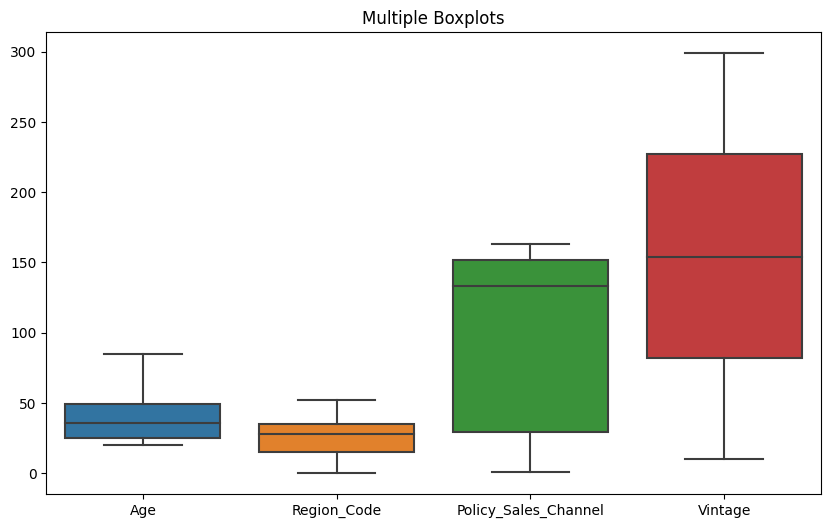

In [77]:
# Chart - 10 visualization code
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df.drop(['Response', 'Annual_Premium'], axis = 1))
plt.title('Multiple Boxplots')
fig.show()

##### 1. Why did you pick the specific chart?

Box plot helps to find the outliers in the data

##### 2. What is/are the insight(s) found from the chart?

There are no outliers present in all the columns except in Annual premium

#### Chart - 11

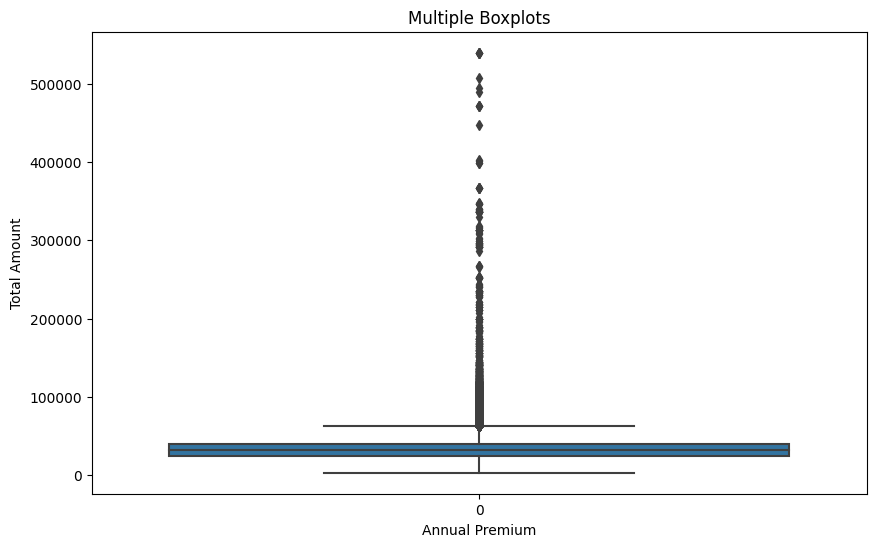

In [78]:
# Chart - 11 visualization code
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df['Annual_Premium'])
plt.xlabel( 'Annual Premium')
plt.ylabel('Total Amount')
plt.title('Multiple Boxplots')
fig.show()

##### 1. Why did you pick the specific chart?

Box plot helps to find the outliers in the data

##### 2. What is/are the insight(s) found from the chart?

There are lot of outliers in the Annual premium column

#### Chart - 12

Text(0.5, 1.0, 'Pair Plot')

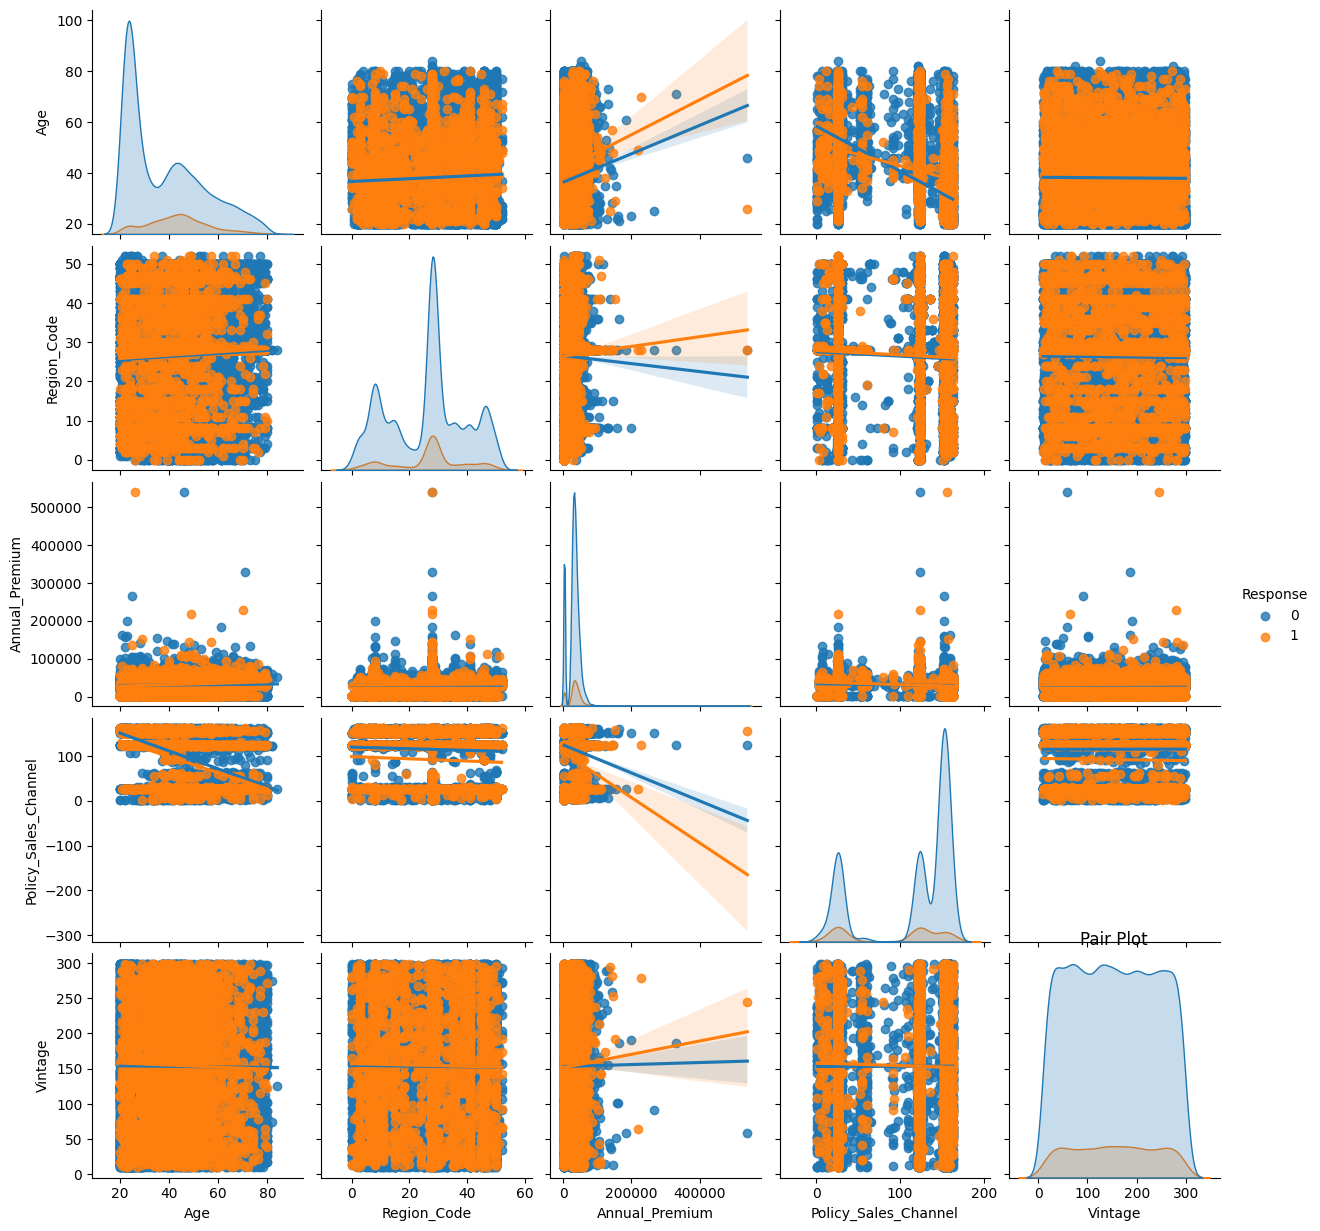

In [79]:
# Chart - 12 visualization code
df_pairplot = df.sample( n= 25000 , random_state = 48)
sns.pairplot(df_pairplot, diag_kind="kde", kind = 'reg', hue = 'Response')

#setting title
plt.title('Pair Plot')

##### 1. Why did you pick the specific chart?

Pair plot helps to compare various variables at once

##### 2. What is/are the insight(s) found from the chart?

* Policy sales channel is negativly corellated to age
* Age and Anual premium is positively correlated

#### Chart - 13 - Correlation Heatmap

<ipython-input-80-ae9a007d39d8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


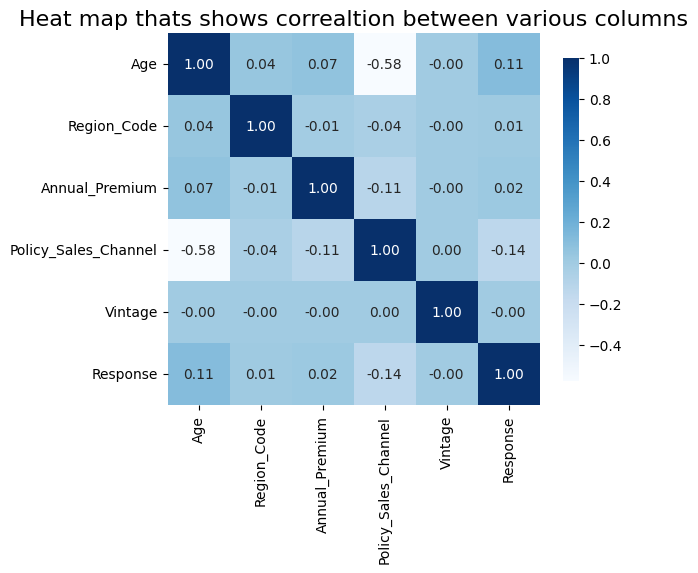

In [80]:
# Correlation Heatmap visualization code
correlation = df.corr()
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(correlation, annot=True, fmt='.2f', vmax=1, square=True, cmap="Blues",
            cbar_kws={'shrink': 0.7})
ax.set_title('Heat map thats shows correaltion between various columns', fontsize = (16))
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap helps us to know the correaltion between various variable

##### 2. What is/are the insight(s) found from the chart?

* Age and policy channel are negatively correlated
* Vintage has almost zero correlation with all the other variable
* Policy sales channel and Response is negatively correlated
* Age has the highest correlation with the Response when compared to all the variables

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [31]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [32]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [33]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [34]:
# Expand Contraction

#### 2. Lower Casing

In [35]:
# Lower Casing

#### 3. Removing Punctuations

In [36]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [37]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [38]:
# Remove Stopwords

In [39]:
# Remove White spaces

#### 6. Rephrase Text

In [40]:
# Rephrase Text

#### 7. Tokenization

In [41]:
# Tokenization

#### 8. Text Normalization

In [42]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [43]:
# POS Taging

#### 10. Text Vectorization

In [44]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [45]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [46]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [47]:
# Transform Your data

### 6. Data Scaling

In [48]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [49]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [50]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [51]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [52]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [53]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [54]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [55]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [56]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [57]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [58]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [59]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [60]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [61]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***